In [ ]:
import numpy as np
import pandas as pd


IMPORTING  DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Restaurant_ reviews.csv to Restaurant_ reviews (2).csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

loading the dataset

In [ ]:
df=pd.read_csv('Restaurant_ reviews.csv', encoding = "ISO-8859-1")

In [ ]:
df.shape

(10000, 8)

In [ ]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [ ]:
hs=df.copy()


In [ ]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


 CLEANING AND PROCESSING OF DATA

In [ ]:
dfs= df.drop(columns=["Time","Pictures","Metadata","Reviewer"])

In [ ]:
train_y=dfs["Rating"]


In [ ]:
train_x=dfs.drop(columns=["Rating"])
train_x

,Restaurant,Review,7514
0,Beyond Flavours,"The ambience was good, food was quite good . h...",2447.0
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,NaN
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,NaN
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,NaN
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,NaN
...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,NaN
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,NaN
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",NaN
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,NaN


In [ ]:
dfs.head()

,Restaurant,Review,Rating,7514
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,2447.0
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,NaN
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,NaN
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,NaN
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,NaN


In [ ]:
train_y=train_y.replace({'Like':3})

In [ ]:
train_y.isnull().sum()

38

In [ ]:
hs['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

<Axes: >

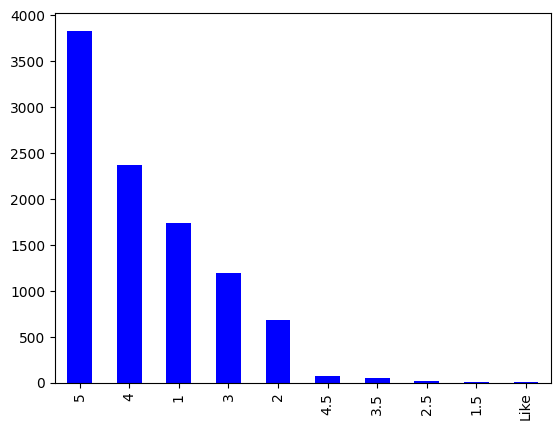

In [ ]:
hs['Rating'].value_counts().plot.bar(color = 'blue')

In [ ]:
train_y=pd.to_numeric(train_y)
train_y=train_y.fillna(train_y.median())

Assigning reviews( positive, negative and neutral)

In [ ]:
for i in range(0,len(train_y)):
   train_y.iloc[i] = round(train_y.iloc[i],0)
for i in range(0,len(train_y)):
    if (train_y[i]>3):
        train_y[i] = 2 #Positive review
    elif (train_y[i]==3):
        train_y[i] = 1 #Neutral review
    else:
        train_y[i] = 0 #Negative review


CLEANING AND PREPROCESSING THE TEXT DATA

In [ ]:
 # Importing essential libraries for NPL(Natural Language Processing)
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()  #Stemming
corpus = []
for i in range(0, len(train_x)):
    review = re.sub('[^a-zA-Z]',' ', str(train_x['Review'][i]))
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Creating the Bag of words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=9000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_x= vectorizer.fit_transform(corpus)

Train && Test && Split...!

In [ ]:
from sklearn.model_selection import train_test_split
X, Xtest, y, ytest = train_test_split(X, train_y, test_size=0.3, random_state=0)

Applying Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
restaurant_review_model = MultinomialNB().fit(X,y)#creation of the model

In [ ]:
y_predict = restaurant_review_model.predict(Xtest)#predicting the test dataset values

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(ytest, y_predict)

In [ ]:
print(conf_mat)

[[ 556   33  119]
 [  78   62  223]
 [  70   53 1806]]


Plotting graph for the Confusion Matrix

Text(95.72222222222221, 0.5, 'Actual values')

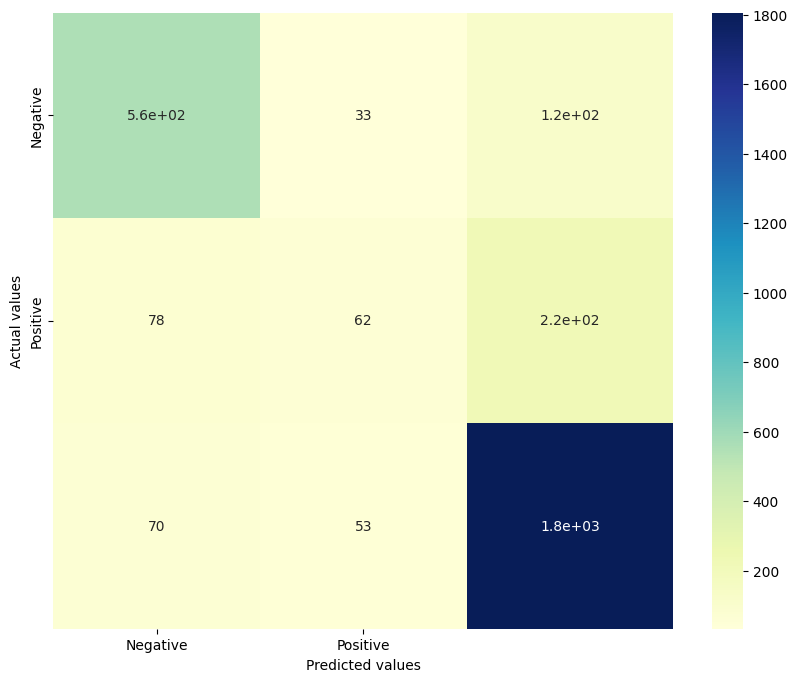

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

Calculating Accuracy_Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_predict)
print(accuracy*100)

80.80000000000001


Classification report of the Dataset

In [ ]:
from sklearn import metrics
print("Classfication Metrics:\n")
print(metrics.classification_report(ytest, y_predict))

Classfication Metrics:

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       708
         1.0       0.42      0.17      0.24       363
         2.0       0.84      0.94      0.89      1929

    accuracy                           0.81      3000
   macro avg       0.68      0.63      0.64      3000
weighted avg       0.78      0.81      0.78      3000



Predictions...!

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return restaurant_review_model.predict(temp)

In [ ]:
# Predicting positive reviews and  negative reviews ...!
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [ ]:
# Predicting positive reviews and  negative reviews ...!
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
